![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

# Aprendizaje no supervisado

## Introducción a Data Science
   
<center>
    <img src='images/facebook-network.png'style="width: 300px;">
</center>

**Profesor**: Juan Bekios Calfa

**Carreras**: ICCI, IECI e IenCI

<sub><sup>Basado en el material de _Practical Data Science_: _Unsupervised Learning_. J. Zico Kolter. _Carnegie Mellon University_.</sup></sub> 

## Introducción

**Aprendizaje supervisado (_Supervised learning_)**


<center>
    <img src='images/supervisado.png'style="width: 900px;">
</center>

imagen: 15-388/688 - Practical Data Science: Unsupervised Learning. J. Zico Kolter. Carnegie Mellon University. 

## Introducción

**Aprendizaje no supervisado (_Unsupervised learning_)**


<center>
    <img src='images/no-supervisado.png'style="width: 900px;">
</center>

imagen: 15-388/688 - Practical Data Science: Unsupervised Learning. J. Zico Kolter. Carnegie Mellon University. 

## Introducción

Prácticamente todos los algoritmos de **aprendizaje no supervisados** pueden considerarse de la misma manera que el **aprendizaje supervisado**:



* Se debe definir una función de hipótesis.
* Se debe definir una función de pérdida.
* ¿Qué función optimiza la función de pérdida?

Pero, ¿qué significan una función de hipótesis y una función de pérdida en un entorno no supervisado?

## Aprendizaje no supervizado (Marco de trabajo)

**Características de entrada** (_Input features_): $x^{(i)}\in \mathbb{R}^n, i=1, \ldots$, m.

**Parámetros del modelo** (_Model parameters_): $\theta \in \mathbb{R}^n$.

**Función de hipótesis**: $h_\theta:\mathbb{R}^n \rightarrow \mathbb{R}^n$, aproxima la entrada a $x^{(i)} \approx h_{\theta}(x^{(i)})$.

**Función de pérdida:** $\ell : \mathbb{R}^n \times \mathbb{R}^n \rightarrow \mathbb{R}_+$, mide la diferencia entre una hipótesis de entrada y una entrada real, por ejemplo:

\begin{equation}
\ell(h_\theta(x),x) = \|h_\theta(x) - x\|_2^2.
\end{equation}

Optimización canónica de aprendizaje automático similar a la anterior,

\begin{equation}
\DeclareMathOperator*{minimize}{minimize}
\minimize_\theta \; \frac{1}{m} \sum_{i=1}^m \ell(h_\theta(x^{(i)}), x^{(i)})
\end{equation}



## Hipótesis y función de pérdida

El _framework_ parace un poco extraño, ¿qué significa tener una función de hipótesis que aproxime a la entrada?.


¿Para que hacer $h_\theta(x)=x$, si ya tengo $x$?

El objetivo del **aprendizaje no supervisado** es elegir alguna clase restringida de funciones de hipótesis que extraigan algún tipo de estructura de los datos (es decir, una que no incluya el mapeo de identidad anterior).

En la clase de hoy veremos dos técnicas para hacer esto:
* _K-means clustering_
* PCA (_Principal component analysis_)

## K-means clustering

Como nuestro primer ejemplo de un algoritmo de aprendizaje supervisado, vamos a considerar el algoritmo de agrupamiento de _k-means_, para ver cómo encaja en el _framework_ anterior. 

Consideraremos el clúster de k-medias desde un punto de vista más visual/geométrico, solo como una forma de agrupar puntos de datos.

In [1]:
# Importamos las librerías de matrices y gráfica
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

(-6.0, 6.0, -3.0, 3.0)

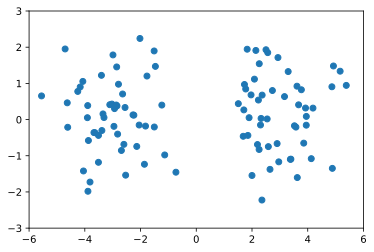

In [2]:
np.random.seed(0)
X = np.vstack([np.random.randn(50,2) + [-3,0], np.random.randn(50,2) + [3,0]])
plt.scatter(X[:,0], X[:,1])
plt.axis([-6,6,-3,3])

## _K-means_: _Framework_ para aprendizaje no supervisado

Los parámetros $\theta$ de la función de hipótesis solo incluyen los centros, 

\begin{equation}
\theta = \{\mu^{(1)}, \ldots, \mu^{(k)}\}
\end{equation}

con $\mu^{(i)} \in \mathbb{R}^n$.

La **función de hipótesis** genera los centros más cercano a un punto.

\begin{equation}
\DeclareMathOperator*{argmin}{argmin}
h_\theta(x) = \argmin_{\mu \in \{\mu^{(1)}, \ldots, \mu^{(k)}\} } \|\mu - x\|_2^2
\end{equation}

La **función de pérdida** es el error al cuadrado entre la entrada y la hipótesis:

\begin{equation}
\ell(h_\theta(x), x) = \|h_\theta(x) - x\|_2^2.
\end{equation}





## _K-means_: _Framework_ para aprendizaje no supervisado


Así, el **problema de optimización** queda de la forma:

\begin{equation}
\minimize_\theta \;\; \frac{1}{m} \sum_{i=1}^m \min_{\mu \in \{\mu^{(1)}, \ldots, \mu^{(k)}\}} \|\mu - x^{(i)}\|_2^2.
\end{equation}




## Optimización de la función objetivo _k-means_

<hr/>

**Algorithm**: K-means

**Given:** Data set $x^{(i)}, i=1,\ldots,m$

**Initialize:**
    
* $\mu^{(j)} := \mbox{RandomChoice}(x^{(1:m)}), \; j=1,\ldots,k$

**Repeat until convergence:**

* Assign point clusters: $y^{(i)} := \argmin_j \|\mu^{(j)} - x^{(i)}\|_2^2, \; i=1,\ldots,m$
* Compute new centers: $\displaystyle \mu^{(j)} := \sum_{i=1}^m \frac{x^{(i)} \mathrm{1}\{y^{(i)} = j\}}{\mathrm{1}\{y^{(i)} = j\}}, \;\; j=1,\ldots,k$

<hr/>

## Ilustración del algoritmo _k-means_

La siguiente es una implementación razonablemente eficiente del algoritmo. 

El aspecto clave que hace que esto sea eficiente es que calculamos las distancias entre todos los puntos y todos los centros usando operaciones matriciales (la misma estrategia se usó anteriormente al crear características RBF en nuestra configuración de clasificación no lineal). 

Por simplicidad, aquí ejecutamos el algoritmo para un número fijo de iteraciones en lugar de verificar la convergencia explícitamente.

In [3]:
def kmeans(X, k, max_iter=10, rand_seed=0):
    np.random.seed(rand_seed)
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        y = np.argmin(D,axis=1)
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)])
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]
    return Mu, y, loss

La primera línea asigna centros al azar a $k$ de los puntos de datos. Luego repetimos para iteraciones de `max_iter`, cada vez:

1. Calcular la distancia entre todos los puntos y todos los grupos o _clusters_, `D`.

2. Calcular la asignación de grupos de cada punto, `y`

3. Volver a calcular los centros como el promedio de sus puntos

Finalmente, retornamos los _clusters_ más el cuadrado de la **función de pérdida**.

Por ejemplo, consideremos tres diferentes _clusters_ sintéticos.

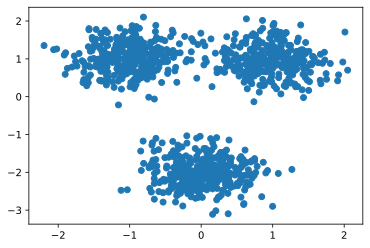

In [4]:
X = m,n = (1000,2)
np.random.seed(0)
X = 0.4*np.random.randn(m,n)
Mu0 = np.array([[0,-2], [-1,1], [1,1]])
X += Mu0[np.random.choice(np.arange(3), m),:]
plt.scatter(X[:,0], X[:,1])

In [5]:
colors = np.array(["C0", "C1", "C2"])
def kmeans_visualize(X, k, max_iter=10, rand_seed=0):
    f,ax = plt.subplots(max_iter, figsize=(6.0, 4.6*max_iter))
    np.random.seed(rand_seed)
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        y = np.argmin(D,axis=1)
        ax[i].scatter(X[:,0], X[:,1], c=colors[y])
        ax[i].scatter(Mu[:,0], Mu[:,1], c='k')
         
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)])
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]
    return Mu, y, loss

Ejecutaremos el programa para itere 4 veces, y inicializamos el problema con 3 _clusters_.

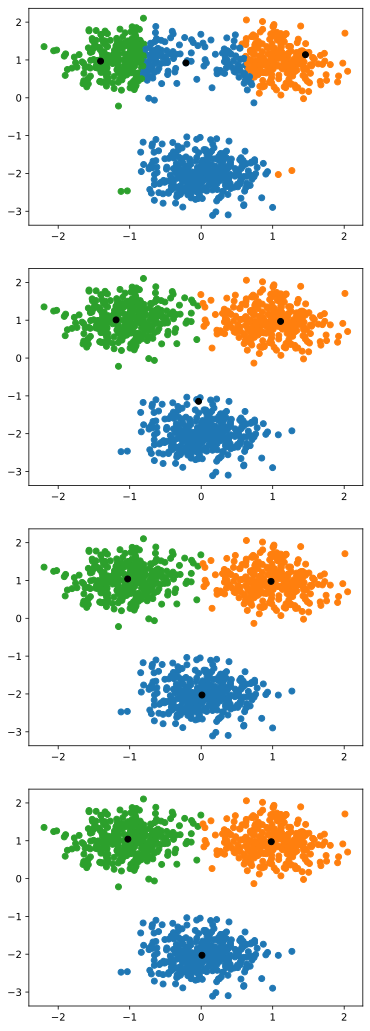

In [6]:
_, _, _ = kmeans_visualize(X, 3, max_iter=4, rand_seed = 3)

Sin embargo, se debe tener en  cuenta que _k-means_ es particularmente susceptible de quedarse atascado en óptimos locales. Por ejemplo, con una inicialización aleatoria diferente, podemos obtener el siguiente comportamiento.

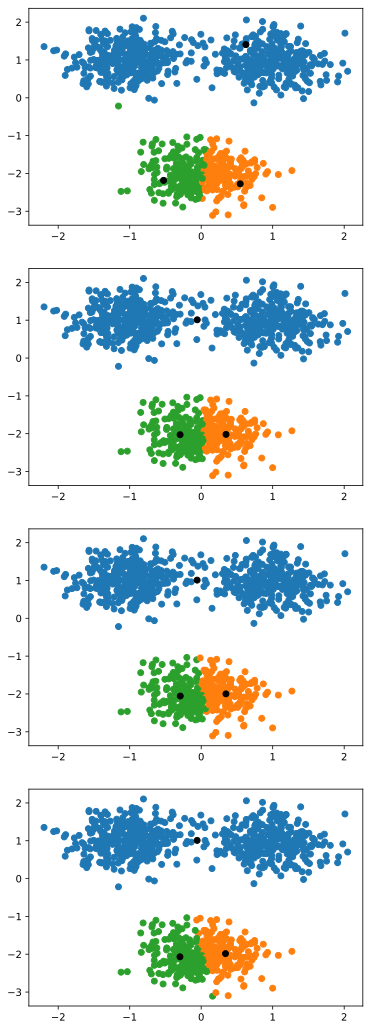

In [7]:
_, _, _ = kmeans_visualize(X, 3, max_iter=4, rand_seed=13)

## Implementación para _clusters_ pobres

La idea básica de este enfoque es que en lugar de simplemente elegir los centros para que sean puntos aleatorios, muestreamos los centros iniciales de manera iterativa, cada vez poniendo una mayor probabilidad en los puntos que están lejos de cualquier centro existente. Formalmente, el algoritmo procede de la siguiente manera.

## K-means++

<hr/>
**Algorithm**: K-means++

**Given:** Data set $x^{(i)}, i=1,\ldots,m$

**Initialize:**
    
* $\mu^{(1)} := \mbox{RandomChoice}(x^{(1:m)})$

**For $j=2,\ldots,k$**

* Computing probabilities of selecting each point
\begin{equation}
p^{(i)} = \frac{\min_{j'<j} \|\mu^{(j')} - x^{(i)}\|_2^2}{\sum_{i'=1}^m \min_{j'<j} \|\mu^{(j')} - x^{(i')}\|_2^2}
\end{equation}
* Select next center given the appropriate probabilities
\begin{equation}
\mu^{(j)} := \mbox{RandomChoice}(x^{(1:m)}, p^{(1:m)})
\end{equation}

<hr/>

## ¿Cómo seleccionar _k_?

No existe una forma "correcta" de seleccionar _k_ (número de agrupaciones o _clusters_): una _k_ **más grande** prácticamente siempre tendrá una pérdida menor que una _k_ más pequeña, incluso en un conjunto de validación.

En cambio, es común ver **la función de pérdida** aumenta en función de _k_ y detenerse cuando las cosas se ven "bien" (muchas otras heurísticas, pero no superan de manera convincente esto).

Text(0, 0.5, 'Media del loss')

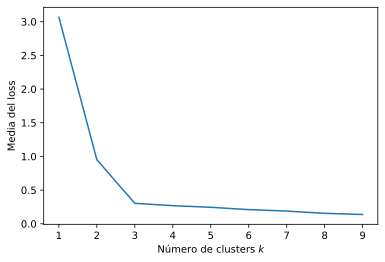

In [8]:
losses = [kmeans(X,k,max_iter=10,rand_seed=0)[2] for k in range(1,10)]
plt.plot(range(1,10), losses)
plt.xlabel("Número de clusters $k$")
plt.ylabel("Media del loss")

En este caso, parece razonable elegir 3 _clusters_, ya que la pérdida disminuye bastante rápidam hasta ese punto. y solo disminuye lentamente después de eso. 

Pero nuevamente, enfatizaremos que excepto en ejemplos extremadamente elaborados como este (donde realmente hay una pequeña cantidad de grupos que generan los datos), casi nunca es posible determinar el número "verdadero" de grupos a partir de dicho análisis.

## Ejemplo: Digitos escritos a mano

Como ejemplo, consideremos la tarea de agrupar imágenes de dígitos escritos a mano del conjunto de datos MNIST.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

print(mnist.data.shape)

### Visualizar los datos


In [ ]:
dat = mnist.data[np.random.choice(mnist.data.shape[0],50)]
def plot_mnist(dat, M, N):
    digits = np.vstack([np.hstack([np.reshape(dat[i*N+j,:],(32,32)) 
                                   for j in range(N)]) for i in range(M)])
    plt.imshow(255-digits, cmap="gray")
    plt.xticks([])
    plt.yticks([])
plot_mnist(dat, 5, 10)

Ejecutamos el código para 30 _clusters_.

In [ ]:
Mu, y, l = kmeans(mnist.data, 30, max_iter=10, rand_seed=0)
plot_mnist(Mu,5,6)

Ejecutamos para 10 _clusters_

In [ ]:
Mu, y, l = kmeans(mnist.data, 10, max_iter=10, rand_seed=0)
plot_mnist(Mu,2,5)

### ¿Cuántos serán los _clusters_ óptimos?


In [ ]:
losses = [kmeans(mnist.data, k, max_iter=10, rand_seed=0)[2] for k in range(1,20)]
plt.plot(range(1,20), losses)